# 2nd Assginment
## Exercise 3
November 17, 2022

### Load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPool2D,
    Dense,
    Flatten,
    Dropout,
    Input,
    AveragePooling2D,
    Activation,
    MaxPooling2D,
    BatchNormalization,
)

In [ ]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape)) 
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

170498071/170498071 [==============================] - 2s 0us/step
Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


In [ ]:
x_train=x_train/255
x_test=x_test/255

y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Confusion Matrix Function: Gets a model and print a confusion matrix using heatmap.

In [ ]:
def show_confusion_matrix(model):
  y_pred = np.argmax(model.predict(x_test),axis=1) 
  y_true = np.argmax(y_test_cat,axis=1)
  confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(12, 9))
  cmap = sns.heatmap(confusion_matrix, annot=True, fmt='g')
  cmap.set(xticklabels=labels, yticklabels=labels)

### 1st Model: base model

In [ ]:
model_1=Sequential()
model_1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPool2D(pool_size=(2,2)))
model_1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPool2D(pool_size=(2,2)))
model_1.add(Flatten())
model_1.add(Dense(256,activation='relu'))
model_1.add(Dense(10,activation='softmax'))
model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [ ]:
history_1 = model_1.fit(x_train, y_train_cat, epochs=20, validation_data=(x_test, y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 17s 5ms/step - loss: 1.4908 - accuracy: 0.4594 - val_loss: 1.2501 - val_accuracy: 0.5501
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1710 - accuracy: 0.5876 - val_loss: 1.1396 - val_accuracy: 0.5963
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0268 - accuracy: 0.6394 - val_loss: 1.1320 - val_accuracy: 0.6123
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9182 - accuracy: 0.6800 - val_loss: 0.9678 - val_accuracy: 0.6605
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8352 - accuracy: 0.7083 - val_loss: 0.9627 - val_accuracy: 0.6722
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7544 - accuracy: 0.7355 - val_loss: 0.9642 - val_accuracy: 0.6729
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6868 - accuracy: 0.7573 - val_loss: 1.0113 - val_accuracy

In [ ]:
evaluation = model_1.evaluate(x_test, y_test_cat)
'Test Accuracy: {}'.format(evaluation[1])

313/313 [==============================] - 1s 3ms/step - loss: 2.0010 - accuracy: 0.6448


'Test Accuracy: 0.6448000073432922'

313/313 [==============================] - 1s 2ms/step


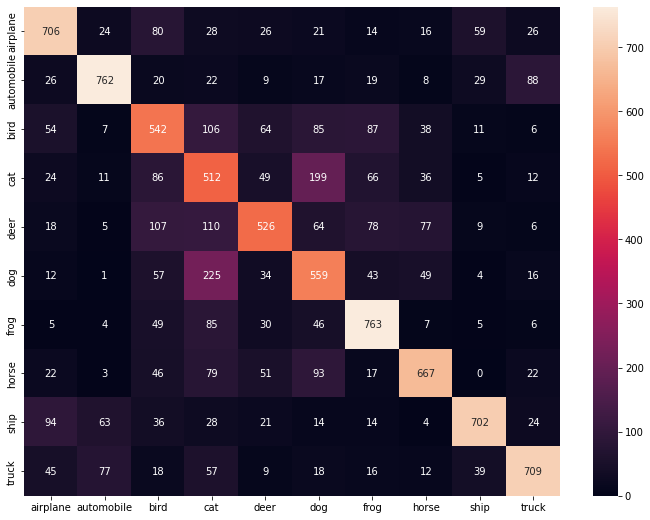

In [ ]:
show_confusion_matrix(model_1)

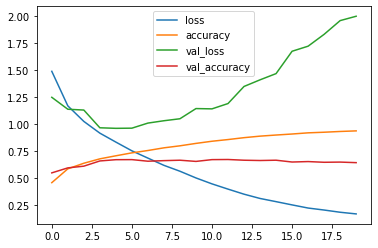

In [ ]:
pd.DataFrame(history_1.history).plot()

### 2nd Model:  Regularizing to Prevent Overfitting Using Dropout

In [ ]:
model_2=Sequential()
model_2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(256,activation='relu'))
model_2.add(Dense(10,activation='softmax'))
model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)         

In [ ]:
history_2 = model_2.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5942 - accuracy: 0.4158 - val_loss: 1.3043 - val_accuracy: 0.5315
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2905 - accuracy: 0.5399 - val_loss: 1.1566 - val_accuracy: 0.5918
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1633 - accuracy: 0.5914 - val_loss: 1.0516 - val_accuracy: 0.6278
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0699 - accuracy: 0.6237 - val_loss: 1.0226 - val_accuracy: 0.6316
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9982 - accuracy: 0.6500 - val_loss: 0.9634 - val_accuracy: 0.6622
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9405 - accuracy: 0.6724 - val_loss: 0.9282 - val_accuracy: 0.6722
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8949 - accuracy: 0.6859 - val_loss: 0.9145 - val_accuracy:

In [ ]:
evaluation = model_2.evaluate(x_test, y_test_cat)
'Test Accuracy: {}'.format(evaluation[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.8798 - accuracy: 0.7139


'Test Accuracy: 0.7139000296592712'

313/313 [==============================] - 1s 2ms/step


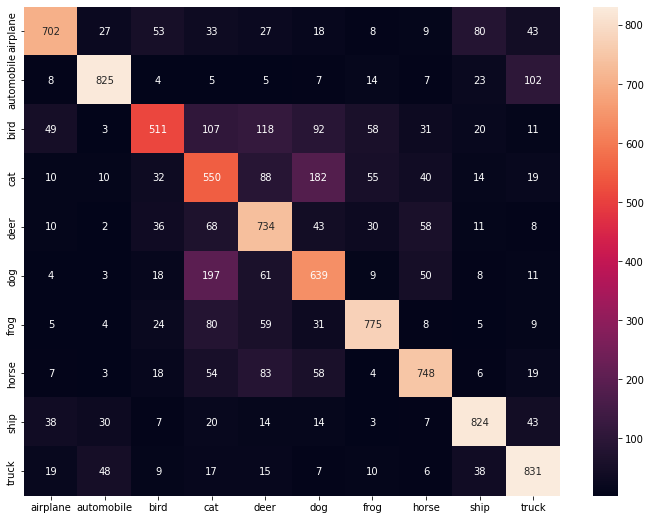

In [ ]:
show_confusion_matrix(model_2)

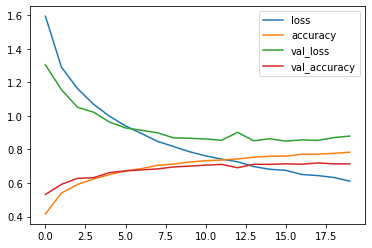

In [ ]:
pd.DataFrame(history_2.history).plot()

### 3rd Model: Adding More Layers and Adding More Filters in Convolutional Layers + increasing epochs number to 30 for better training

In [ ]:
model_3 = Sequential()
model_3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model_3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model_3.add(MaxPool2D(2,2))
model_3.add(Dropout(0.4))
model_3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model_3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model_3.add(MaxPool2D(2,2))
model_3.add(Dropout(0.4))
model_3.add(Flatten())
model_3.add(Dense(units = 1024, activation = 'relu'))
model_3.add(Dense(units = 1024, activation = 'relu'))
model_3.add(Dense(units = 10, activation = 'softmax'))
model_3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 128)       147584    
                                                      

In [ ]:
history_3=model_3.fit(x_train,y_train_cat,epochs=30,validation_data=(x_test,y_test_cat)) 

Epoch 1/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6019 - accuracy: 0.4097 - val_loss: 1.2972 - val_accuracy: 0.5343
Epoch 2/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2398 - accuracy: 0.5576 - val_loss: 1.1288 - val_accuracy: 0.6018
Epoch 3/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0811 - accuracy: 0.6160 - val_loss: 0.9704 - val_accuracy: 0.6599
Epoch 4/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9726 - accuracy: 0.6542 - val_loss: 0.8565 - val_accuracy: 0.7026
Epoch 5/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8896 - accuracy: 0.6855 - val_loss: 0.8654 - val_accuracy: 0.6977
Epoch 6/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8226 - accuracy: 0.7060 - val_loss: 0.8613 - val_accuracy: 0.7028
Epoch 7/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7700 - accuracy: 0.7293 - val_loss: 0.7845 - val_ac

In [ ]:
evaluation = model_3.evaluate(x_test, y_test_cat)
'Test Accuracy: {}'.format(evaluation[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.8823 - accuracy: 0.7532


'Test Accuracy: 0.7531999945640564'

313/313 [==============================] - 1s 3ms/step


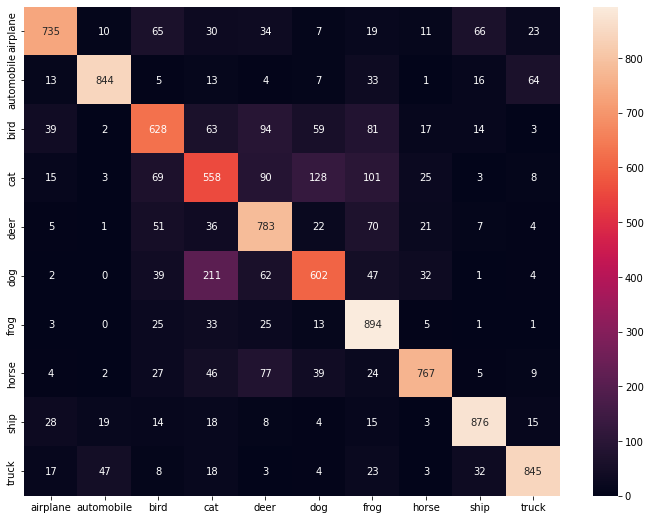

In [ ]:
show_confusion_matrix(model_3)

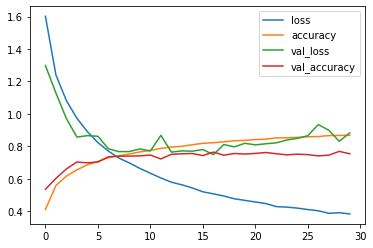

In [ ]:
pd.DataFrame(history_3.history).plot()

### 4th Model: Increasing Layers and Filters Along with Increment with Constant Slope in Dropout

In [ ]:
model_4 = Sequential()
model_4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_4.add(MaxPool2D((2, 2)))
model_4.add(Dropout(0.2))
model_4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_4.add(MaxPool2D((2, 2)))
model_4.add(Dropout(0.3))
model_4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_4.add(MaxPool2D((2, 2)))
model_4.add(Dropout(0.4))
model_4.add(Flatten())
model_4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_4.add(Dropout(0.5))
model_4.add(Dense(10, activation='softmax'))
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [ ]:
history_4=model_4.fit(x_train,y_train_cat,epochs=30,validation_data=(x_test,y_test_cat))

Epoch 1/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7193 - accuracy: 0.3583 - val_loss: 1.2750 - val_accuracy: 0.5425
Epoch 2/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2684 - accuracy: 0.5457 - val_loss: 1.0498 - val_accuracy: 0.6270
Epoch 3/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0958 - accuracy: 0.6154 - val_loss: 0.8970 - val_accuracy: 0.6820
Epoch 4/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9897 - accuracy: 0.6548 - val_loss: 0.8462 - val_accuracy: 0.7025
Epoch 5/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9295 - accuracy: 0.6788 - val_loss: 0.7653 - val_accuracy: 0.7348
Epoch 6/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8914 - accuracy: 0.6911 - val_loss: 0.7694 - val_accuracy: 0.7343
Epoch 7/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8534 - accuracy: 0.7051 - val_loss: 0.7589 - val_accur

In [ ]:
evaluation = model_4.evaluate(x_test, y_test_cat)
'Test Accuracy: {}'.format(evaluation[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.6460 - accuracy: 0.7930


'Test Accuracy: 0.7929999828338623'

313/313 [==============================] - 1s 2ms/step


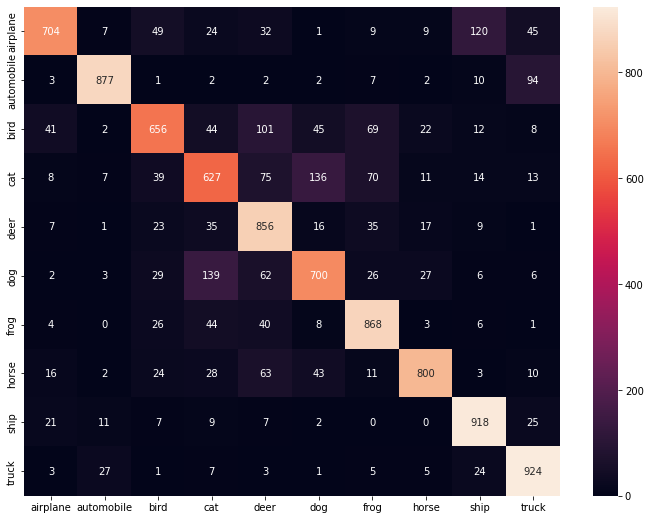

In [ ]:
show_confusion_matrix(model_4)

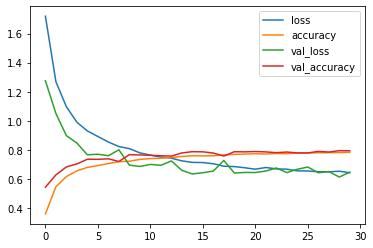

In [ ]:
pd.DataFrame(history_4.history).plot()

### 5th Model: Batch Normalization +  increasing epochs number to 50 for better training

In [ ]:
model_5 = Sequential()
model_5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_5.add(BatchNormalization())
model_5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_5.add(BatchNormalization())
model_5.add(MaxPool2D((2, 2)))
model_5.add(Dropout(0.2))
model_5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_5.add(BatchNormalization())
model_5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_5.add(BatchNormalization())
model_5.add(MaxPool2D((2, 2)))
model_5.add(Dropout(0.3))
model_5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_5.add(BatchNormalization())
model_5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_5.add(BatchNormalization())
model_5.add(MaxPool2D((2, 2)))
model_5.add(Dropout(0.4))
model_5.add(Flatten())
model_5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))
model_5.add(Dense(10, activation='softmax'))
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
history_5=model_5.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))

Epoch 1/50
1563/1563 [==============================] - 16s 11ms/step - loss: 0.2920 - accuracy: 0.8999 - val_loss: 0.4410 - val_accuracy: 0.8600
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2913 - accuracy: 0.8997 - val_loss: 0.4283 - val_accuracy: 0.8624
Epoch 3/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2797 - accuracy: 0.9037 - val_loss: 0.4334 - val_accuracy: 0.8645
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2826 - accuracy: 0.9027 - val_loss: 0.4355 - val_accuracy: 0.8633
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2779 - accuracy: 0.9033 - val_loss: 0.4547 - val_accuracy: 0.8596
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2673 - accuracy: 0.9079 - val_loss: 0.4355 - val_accuracy: 0.8644
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2681 - accuracy: 0.9070 - val_loss: 0.4319 - val_a

In [ ]:
evaluation = model_5.evaluate(x_test, y_test_cat)
'Test Accuracy: {}'.format(evaluation[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.4676 - accuracy: 0.8680


'Test Accuracy: 0.8679999709129333'

313/313 [==============================] - 1s 3ms/step


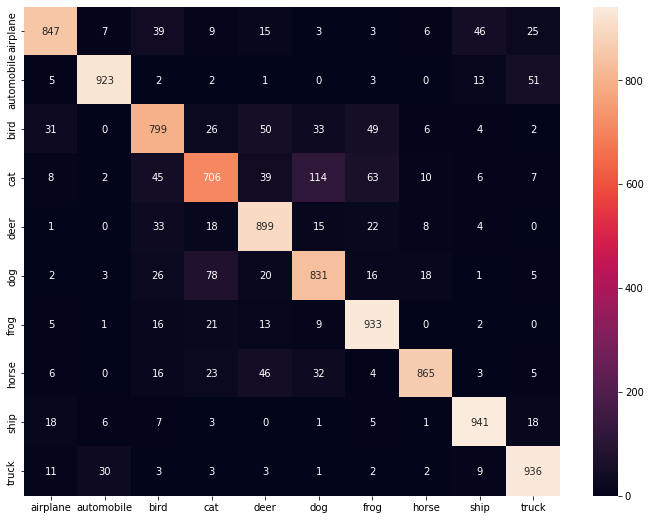

In [ ]:
show_confusion_matrix(model_5)

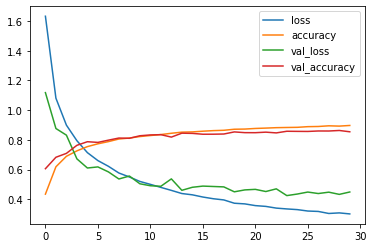

In [ ]:
pd.DataFrame(history_5.history).plot()